<a href="https://colab.research.google.com/github/xehau/xehau_lessons/blob/master/custom_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Python の状態を使う
x = tf.zeros([10, 10])
x += 2  # これは x = x + 2 と等価で, x の元の値を変えているわけではない

print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [ ]:
v = tf.Variable(1.0)
# Python の `assert` を条件をテストするデバッグ文として使用
assert v.numpy() == 1.0

# `v` に値を再代入
v.assign(3.0)
assert v.numpy() == 3.0

# `v` に TensorFlow の `tf.square()` 演算を適用し再代入
v.assign(tf.square(v))
assert v.numpy() == 9.0

In [ ]:
class Model(object):
  def __init__(self):
    # 重みを `5.0` に、バイアスを  `0.0` に初期化
    # 実際には、これらの値は乱数で初期化するべき（例えば `tf.random.normal` を使って）
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

model = Model()

assert model(3.0).numpy() == 15.0

In [ ]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [ ]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

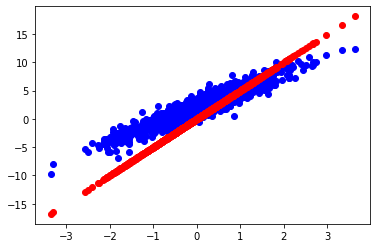

Current loss: 8.559934


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())


In [ ]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.55993
Epoch  1: W=4.64 b=0.39, loss=5.99930
Epoch  2: W=4.34 b=0.70, loss=4.30716
Epoch  3: W=4.10 b=0.96, loss=3.18884
Epoch  4: W=3.90 b=1.17, loss=2.44969
Epoch  5: W=3.74 b=1.33, loss=1.96111
Epoch  6: W=3.61 b=1.47, loss=1.63813
Epoch  7: W=3.50 b=1.58, loss=1.42461
Epoch  8: W=3.41 b=1.67, loss=1.28344
Epoch  9: W=3.34 b=1.74, loss=1.19011


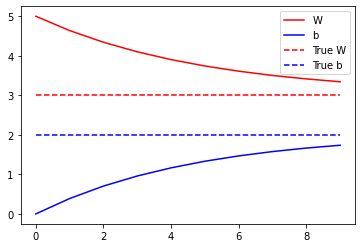

In [ ]:
model = Model()

# 後ほどプロットするために、W 値と b 値の履歴を集める
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

# すべてをプロット
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()